# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, runtime=runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

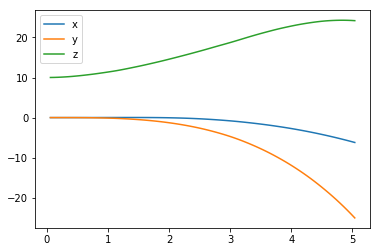

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

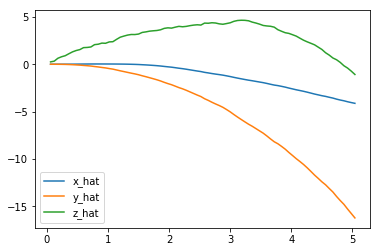

In [96]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

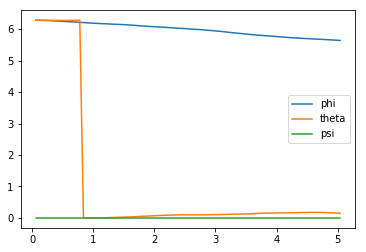

In [97]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

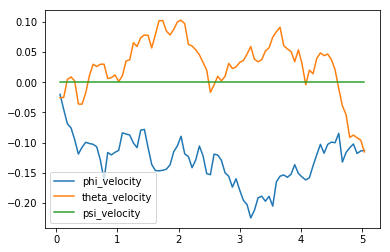

In [98]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

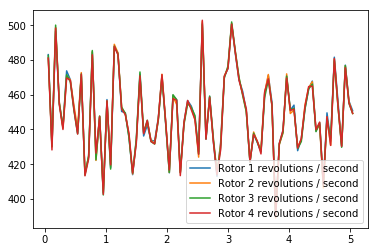

In [99]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [100]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -6.21089783 -25.03528025  24.18465785   5.64109841   0.14698386
   0.        ]
[ -4.12505583 -16.22211058  -1.07827275]
[-0.11290938 -0.11539505  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [101]:
import sys
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =   1.913 (best =   2.125), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

The Task considered here is to reach a target position on Z axis (X and Y axis values should remain the same):

In [2]:
from task import Task
from agents.DDPGAgent import DDPG
import numpy as np
import sys
from collections import deque
import time
from utils.visuals import check_rewards

In [3]:
#Initial conditions, parameters and hyperparameters
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data_jupyter.txt'                         # file name for saved results
file_output_training = 'test_data_during_training_jupyter.txt'      # file name for saved results during training... this gives visibility during training episodes
#Goal position
target_pos = np.array([0., 0., 20.])
num_episodes = 1500
#Window to calculate reward/score average: 10%
window = int(num_episodes*0.1)
action_repeat=3
buffer_size = 100000
batch_size = 64
gamma = 0.99
tau = 0.001
actor_dropout = 0.25
critic_dropout = 0.25
exploration_theta = 0.15
exploration_sigma = 0.3
actor_lr = 0.001
critic_lr = 0.001
done = False

#Percentage of episodes to plot a performance test with current policy
#percentage = 10
#test_training = np.arange(0,10,np.divide(percentage,10))
#test_training = np.divide(test_training, 10)

# initialize average rewards
avg_rewards = []
for i in range(window):
    avg_rewards.append(np.NaN)
# initialize best average reward
best_avg_reward = -np.inf
# initialize monitor for most recent rewards
samp_rewards = deque(maxlen=window)
rewards = deque(maxlen=num_episodes)
avg_reward=0

Create the Task and Agent instance:

In [4]:
task = Task(action_repeat=action_repeat, init_pose=init_pose, init_velocities=init_velocities, init_angle_velocities=init_angle_velocities, runtime=runtime, target_pos=target_pos)
agent = DDPG(task=task, buffer_size=buffer_size, batch_size=batch_size, gamma=gamma, tau=tau, actor_dropout=actor_dropout, critic_dropout=critic_dropout, exploration_theta=exploration_theta, exploration_sigma=exploration_sigma, actor_lr=actor_lr, critic_lr=critic_lr)

Generate episodes:

In [30]:
for i_episode in range(1, num_episodes+1):
    samp_reward = 0
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state)
        next_state, reward, done = agent.task.step(action)
        samp_reward += reward
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            samp_rewards.append(samp_reward)
            rewards.append(samp_reward)
            break
    if (i_episode >= window):
            # get average reward from last "window" episodes
            avg_reward = np.mean(samp_rewards)
            avg_rewards.append(avg_reward)
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
    # shows the agent's performance after "percentage"*num_episodes for visualization purposes
    #if np.divide(i_episode,num_episodes) in (test_training) or i_episode == 1:
    #    agent.test_control(file_output=file_output_training)
    print("\rEpisode = {:4d}, Total Reward = {:7.3f}, Average Reward = {:7.3f} (best = {:7.3f})".format(i_episode, samp_reward, avg_reward, best_avg_reward), end="")
    sys.stdout.flush()

Episode = 1500, Total Reward = -16.610, Average Reward = -21.246 (best = -20.143))

Test the performance of the agent based on the final learned policy:

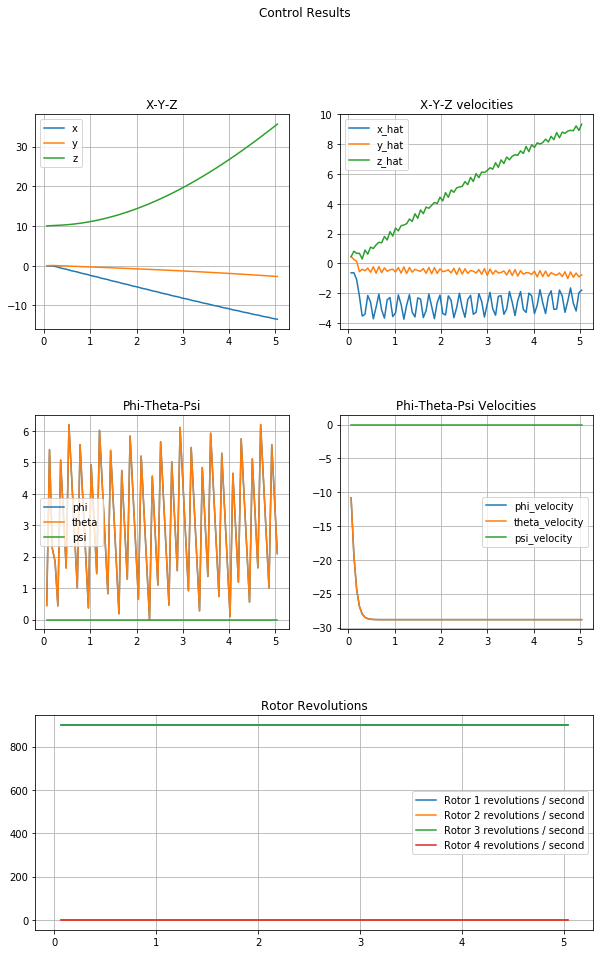

In [31]:
#Using the learned policy to run an episode
agent.test_control(file_output=file_output)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

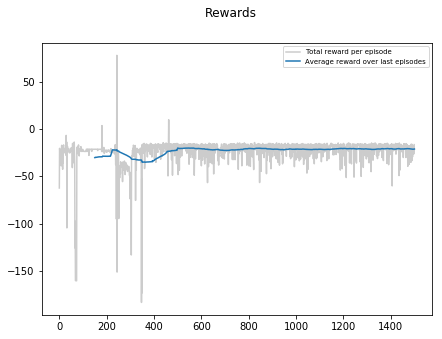

In [32]:
## TODO: Plot the rewards.
#Show the rewards over the episodes
check_rewards(rewards=rewards, avg_rewards=avg_rewards)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I used the properties of the TANH function. This is a differentiable function, and it maintains the output between the [-1,1]. The reward function is the following: **reward = np.tanh(1 - 0.1*(distance))**, where **distance** is the euclidian distance between the position of the quadcopter and the target position. The visualization of this function is given by the heatmap bellow. The plot shows 2 dimensions, for visualization purposes, but we can generalize for the 3 spatial dimensional case.

In [35]:
def get_reward(pose, target_pos):
    eucl_distance = lambda a, b: np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
    distance = eucl_distance(pose, target_pos)
    reward = np.tanh(1 - 0.1*(distance))
    return reward

def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)
    return R

As we can see, the reward function is symmetric and has a continuous gradient w.r.t the spatial dimensions

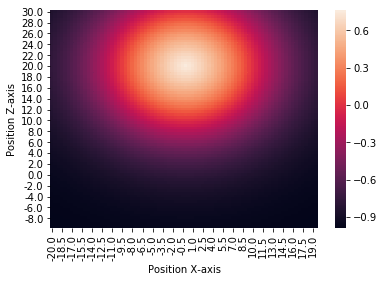

In [38]:
import pandas as pd
import seaborn as sns
x_range = np.round(np.arange(-20.0,20,0.5), 2)
z_range = np.round(np.arange(30,-10,-0.5), 2)

target_pos = np.array([0, 20])

R = map_function(get_reward, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?

- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?

- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:


- What learning algorithm(s) did you try? What worked best for you?

    I used the actor-critic DDPG algorithm as the basis for the learning process. The main modifications were as follows:
    * **Prioritized Experience Replay**, in order to generate a more robost learning process (this includes the Importance-Sampling Weights)
    * Changes in the **architecture** of the Neural Nets, like including more units, adding batch normalization, adding weight regularization and dropout layers, adding more layers to generate more complex shapes.
    * **Initializing the weights** of the output layers with values near zero.
    * Changes on **hyperparameters**


- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?

    * $\alpha$ = 0.001
    * $\gamma$ = 0.99
    * $\tau$ = 0.001
    * e (Prioritized Experience Replay constant) = 0.0000001
    * a (Prioritized Experience Replay constant) = 0.6
    * $\beta$ (Prioritized Experience Replay constant) = 0.4 (increment of 0.00005 per timestep)


- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.
    
    The architectures are given bellow. The number of hidden units, the weight initialization strategy and most of the hyperparameters were based on the original Deep Deterministic Policy Gradient paper: "CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING" https://arxiv.org/pdf/1509.02971v2.pdf

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(agent.actor_local.model, to_file='actor.png', show_shapes=True, show_layer_names=True)
plot_model(agent.critic_local.model, to_file='critic.png', show_shapes=True, show_layer_names=True)

Actor Neural Net Architecture:

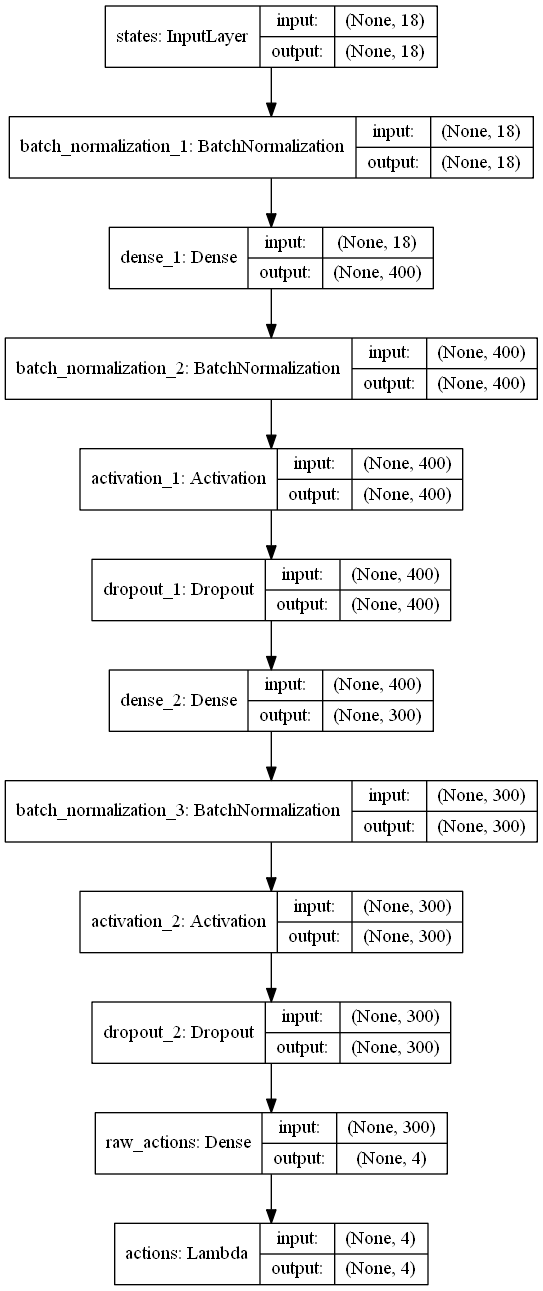

In [40]:
from IPython.display import Image
Image("actor.png")

Critic Neural Net Architecture:

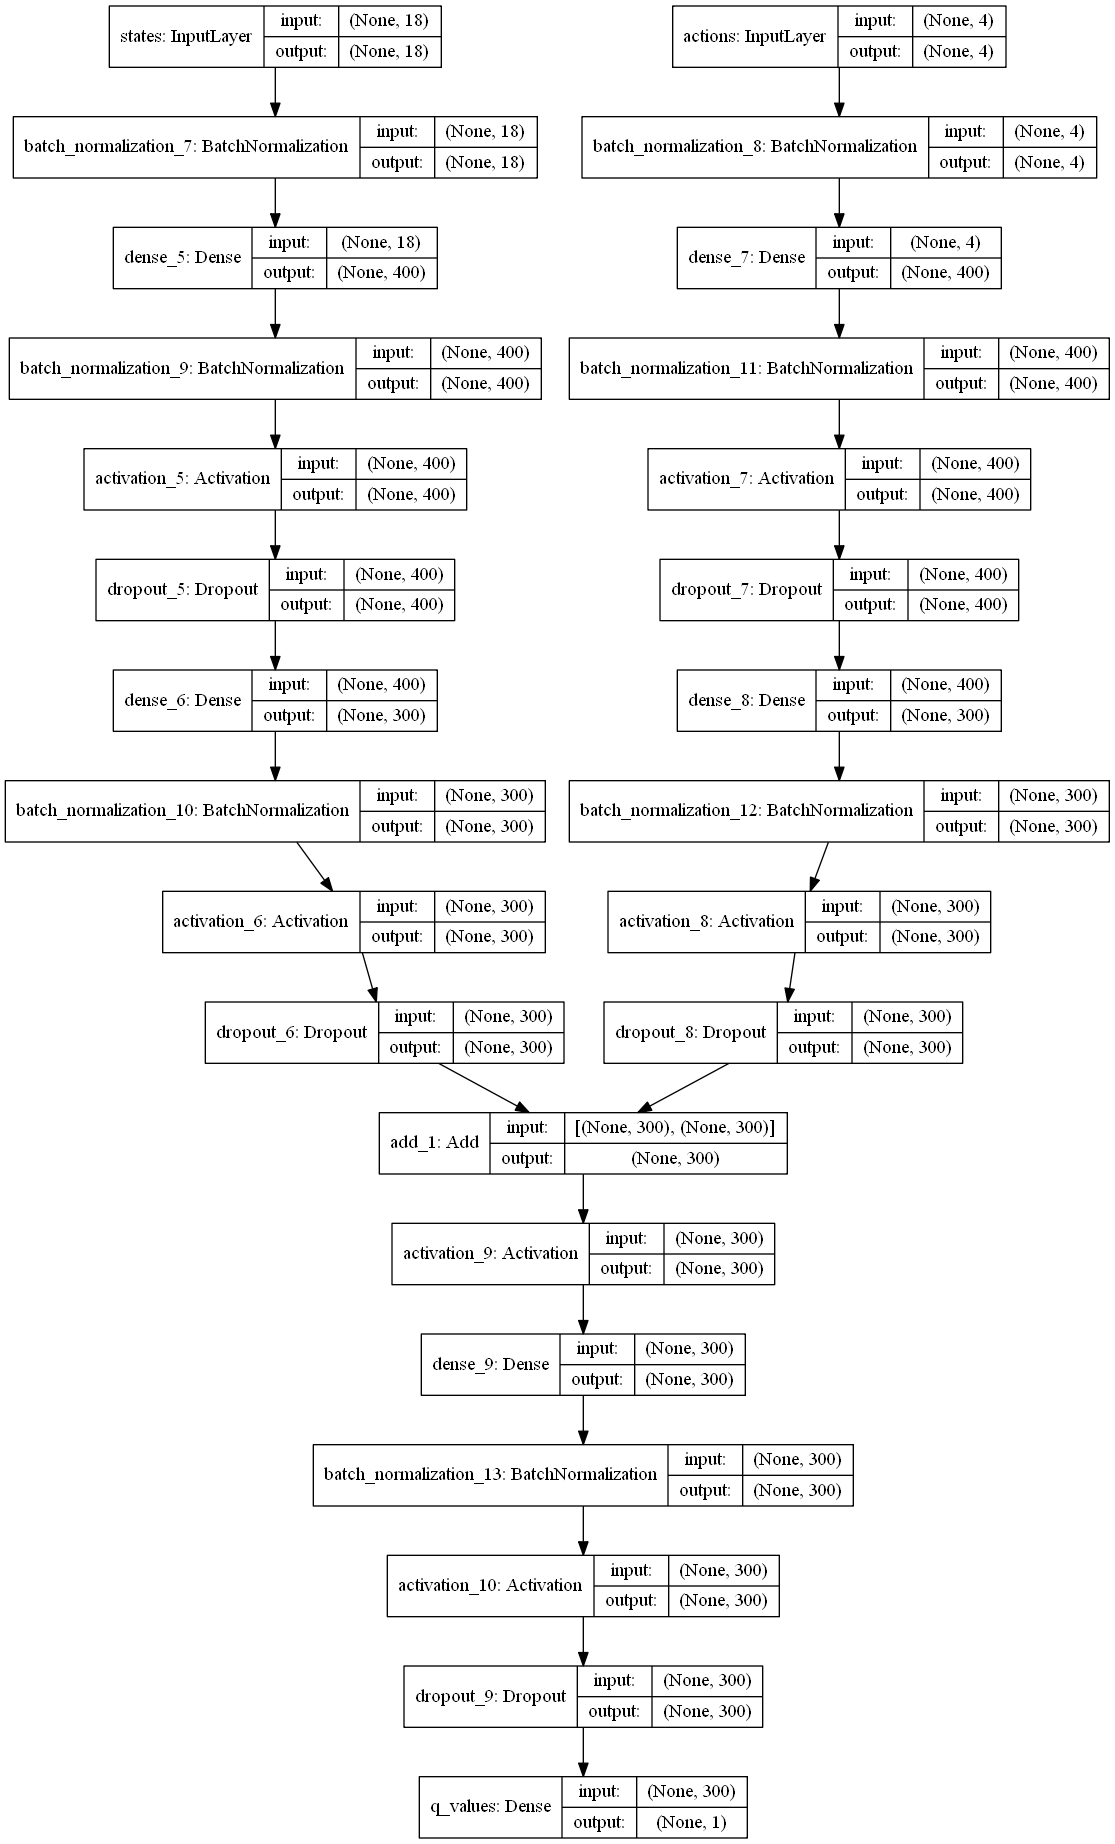

In [41]:
Image("critic.png")

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task is hard to learn, and still there is a lot of improvement to be made. I tried many hyperparameters (different values for gamma, num episodes, tau, etc), layer sizes (from the given 64 units to the final 400 units suggested by the referenced paper) and yet these couldn't improve as much as I expected. The average reward doesn't show a gradual learning process.

Some of the improvements I propose for next implementations are the following:

   * **Dueling Network algorithm** - this can improve the accuracy of the approximation for the Q values, as they can be thought of as being V(s) + A(s,a)
   * Try out different **exploration techniques**
   * **Reward engineering** - there are more variables which were not considered by the reward function, for example the angular position of the quadcopter, the angular velocities, the rotor speeds (which should not vary abruptly). Considering these can lead to better estabilization during flying.

As we can see by the rewards plot, the mean keeps +- (-25) at the final stage of training.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

During this project there were many configurations (hyperparameters, architectures, reward functions, algorithms) which I could try using. I believe that the hardest part is actually trying and fine tuning many of these possible configurations in order to make the agent learn something. Specifically during the reward engineering part of the project, one of the most important things is to visualize the function you are building. I spent a lot of time trying to create functions with my eyes "blinded". When I realized that the visualization is crucial, I chose for a simple solution.

I really find very interesting Reinforcement Learning, and this project made me practice the difficulties during the agent's learning process. Particularly, about the performance of the agent, there is still a lot to improve, but I'm satisfied with it as a first project.